In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load the JSON data
def load_json(file_path):
    with open(file_path, "r") as file:
        data = json.load(file)
    
    df = pd.DataFrame(data)
    df["labels"] = df["labels"].apply(lambda x: "Positive" if x else "Negative")
    return df

df = load_json("../validation_losses.json")
df['kind'] = 'With training'

df_no_train = load_json("../validation_losses_no-train.json")
df_no_train['kind'] = 'Without training'

df_ls1 = load_json("../validation_losses_ls1.json")
df_ls1['kind'] = 'Training with label smoothing 0.1'

df_ls2 = load_json("../validation_losses_ls2.json")
df_ls2['kind'] = 'Training with label smoothing 0.2'

df = pd.concat([df, df_no_train, df_ls1, df_ls2])

In [2]:
import seaborn as sns

def plot_losses(df_loss, axs, title):
    ax = sns.histplot(df_loss, x="losses", hue="labels", bins=50,stat="density", common_norm=False, ax=axs)
    ax.set_xlabel("Loss")
    ax.set_title(title)

/mnt/data/xjarol06_firllm/anaconda3/envs/md2d-fresh/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/mnt/data/xjarol06_firllm/anaconda3/envs/md2d-fresh/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/mnt/data/xjarol06_firllm/anaconda3/envs/md2d-fresh/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/mnt/data/xjarol06_firllm/anaconda3/envs/md2d-fresh/lib/python3.11/site-packages/seaborn

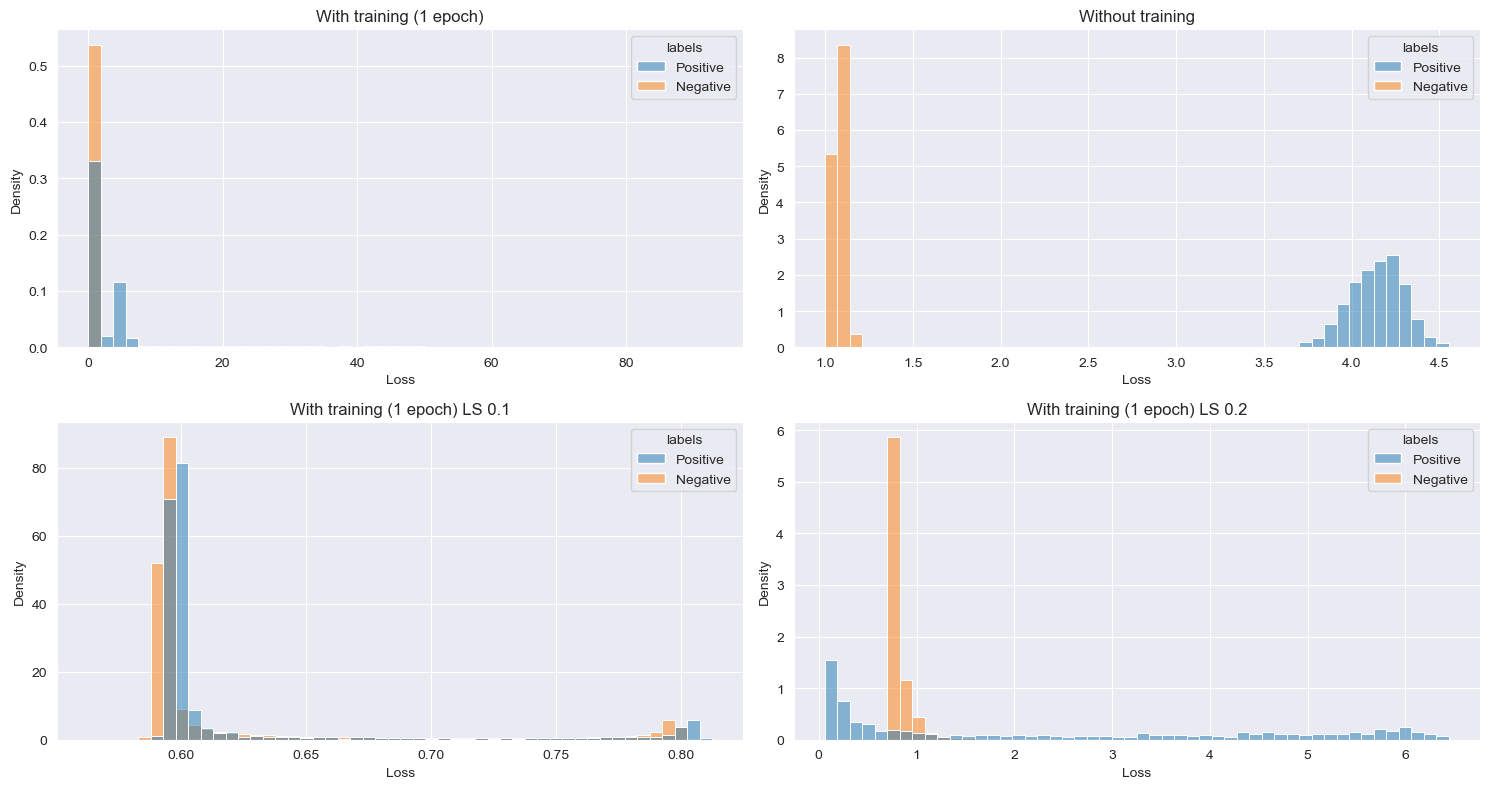

In [3]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15, 8))
plot_losses(df, axs[0, 0], "With training (1 epoch)")
plot_losses(df_no_train, axs[0, 1], "Without training")

plot_losses(df_ls1, axs[1, 0], "With training (1 epoch) LS 0.1")
plot_losses(df_ls2, axs[1, 1], "With training (1 epoch) LS 0.2")

fig.tight_layout()


In [4]:

print(df[df['labels'] == 'Negative']['losses'].sum())
df[df['labels'] == 'Negative']['losses'].describe() 


1110959.907363981


count    1.732014e+06
mean     6.414266e-01
std      3.521483e-01
min      5.149841e-05
25%      5.921894e-01
50%      5.974303e-01
75%      7.970069e-01
max      5.396073e+00
Name: losses, dtype: float64

In [5]:

print(df[df['labels'] == 'Positive']['losses'].sum()) 
df[df['labels'] == 'Positive']['losses'].describe() 

44572.740967903286


count    8386.000000
mean        5.315137
std        12.657066
min         0.039270
25%         0.597748
50%         0.629293
75%         4.162746
max        92.778366
Name: losses, dtype: float64

In [6]:
df_pos = df[df['labels'] == 'Positive']
print(df_pos[df_pos['losses'] > 10]['losses'].sum()) 
print(df_pos[df_pos['losses'] <= 10]['losses'].sum()) 

30922.576139450073
13650.164828453213


In [7]:
df

,labels,losses,kind
0,Positive,0.486217,With training
1,Negative,0.507253,With training
2,Negative,0.904286,With training
3,Negative,0.000326,With training
4,Negative,0.000274,With training
...,...,...,...
307195,Negative,0.740970,Training with label smoothing 0.2
307196,Negative,0.752178,Training with label smoothing 0.2
307197,Negative,0.848832,Training with label smoothing 0.2
307198,Negative,0.829708,Training with label smoothing 0.2
